In [5]:

import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from glob import glob
import re

def vector_dist(v1, v2): # euclidean distance between 2 points
    return math.sqrt(np.sum([(v1[i] - v2[i])**2 for i in range(len(v1))]))

true_diag = [20, 59]
true_antidiag = [36, 35]
mlen = 3 # number states


In [22]:
def parser_arr(filename):
    # returns array of all traansitions and list of all class and transition thresholds
    transitions = []
    thresholds = []
    vidarrs = []
    with open(filename) as textfile:
        line = textfile.readline()
        #print('opened', line)
        while line:
            if 'T threshold'in line:
                thresh_set = []
                for word in line.split():
                    try:
                        thresh_set.append(float(word))
                    except ValueError:
                        pass
                    
                line = textfile.readline()
                #print('after t', line)
                if 'C threshold' in line:
                    for word in line.split():
                        try:
                            thresh_set.append(float(word))
                        except ValueError:
                            pass
                        
                
                    if len(thresholds) ==0 or thresholds[-1] != thresh_set:
                        #print(thresh_set)
                        thresholds.append(thresh_set)
                        vidarrs.append([])
                        vidsarr = np.zeros((mlen,mlen))
                        transitions.append(vidsarr)
                    else:
                        pass    
                    
                    line = textfile.readline()
                    #print('array lives here', line)
                    if '[[' in line:
                        arr = np.zeros((mlen,mlen))
                        #print(arr)
                        linenums = [int(s) for s in  re.findall(r'\d+',line)]
                        #print(linenums)
                        arr[0,:] = linenums

                        line = textfile.readline()
                        #print('array lives here', line)   

                        linenums = [int(s) for s in  re.findall(r'\d+',line)]
                        #print(linenums)
                        arr[1,:] = linenums

                        line = textfile.readline()
                        #print('array lives here', line)   

                        linenums = [int(s) for s in  re.findall(r'\d+',line)]
                        #print(linenums)
                        arr[2,:] = linenums

                        transitions[-1] += arr
                        vidarrs[-1].append(arr)
                        #print(arr,'\n', transitions[-1])
                    else:
                        print("missing array")
                    #print(thresholds[-1])
                else:
                    print("missing C thresh")
                
                
                    
            line = textfile.readline()
            #print(line, 'moved on')
                    
                
            
    textfile.close()
    #print(transitions, thresholds)
    return([transitions, np.array(thresholds), vidarrs]) 


In [23]:
cols = [ 'mediumslateblue','fuchsia','darkviolet' ]
print(parser_arr(glob('./output 052*.txt')[0]))

[[array([[100.,   1.,  51.],
       [  2.,   1.,   0.],
       [ 59.,   0., 137.]]), array([[ 92.,   1.,  29.],
       [  2.,   1.,   0.],
       [ 37.,   0., 151.]]), array([[13.,  1., 46.],
       [ 2.,  0.,  0.],
       [50.,  0., 26.]])], array([[30.        , 22.        ],
       [30.        , 35.        ],
       [34.57142857, 22.        ]]), [[array([[ 8.,  1., 38.],
       [ 2.,  1.,  0.],
       [38.,  0.,  0.]]), array([[3., 0., 1.],
       [0., 0., 0.],
       [2., 0., 4.]]), array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 1.,  0., 12.]]), array([[ 0.,  0.,  1.],
       [ 0.,  0.,  0.],
       [ 2.,  0., 12.]]), array([[4., 0., 6.],
       [0., 0., 0.],
       [7., 0., 2.]]), array([[1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 3.]]), array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 7.]]), array([[56.,  0.,  1.],
       [ 0.,  0.,  0.],
       [ 2.,  0.,  6.]]), array([[ 1.,  0.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0., 26.]]), array([[25.,  0., 

[54.33526012  1.73410405 43.93063584] [61.22931442 11.82033097 26.95035461]
[53.4591195   1.57232704 44.96855346] [59.71479501 11.76470588 28.52049911]
[47.78882413  1.40555365 50.80562221] [53.38837289 11.76470588 34.84692122]
[43.49771423  1.25474176 55.24754401] [49.4612977  11.75213675 38.78656555]
[45.22246535  1.0940919  53.68344274] [51.12007168 11.64874552 37.2311828 ]
[44.91507654  1.06940658 54.01551688] [50.92592593 11.64021164 37.43386243]
[43.18481413  1.02820986 55.78697601] [49.5284104  11.64021164 38.83137796]
[57.54373501  0.71929669 41.7369683 ] [60.22222222 11.38888889 28.38888889]
[51.80467091  0.63694268 47.55838641] [56.4532917  11.38433515 32.16237315]
[46.95296052  0.4758746  52.57116488] [54.15092512 11.33633634 34.51273854]
[46.95296052  0.4758746  52.57116488] [54.15092512 11.33633634 34.51273854]
[46.83840749  0.46838407 52.69320843] [54.09876543 11.33333333 34.56790123]
[46.92381082  0.46613057 52.61005861] [54.141837   11.33186166 34.52630134]
[47.06993833

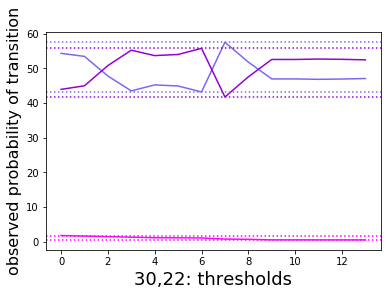

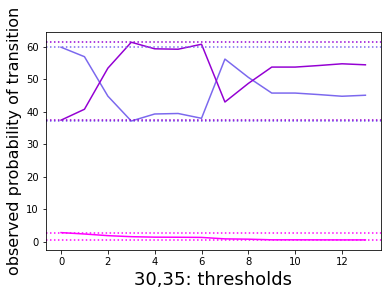

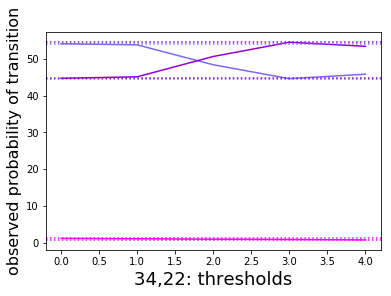

In [34]:
#broad observations array
trans_runs= parser_arr(glob('./output 052*.txt')[0])
def ratio(row):
    sums = np.sum(row)
    if sums > 0:
        return row/sums
    else:
        return row
index = list(range(len(trans_runs[0])))

criteria = []

for i in index:
    x1 = []
    x2 = []
    x3 = []
    c_threshes = []
    t_threshes = []
    trans_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    vidarrs = trans_runs[2][i]
    vidarrs = np.cumsum(vidarrs, axis=0)
    #print(vidarrs)
    t_threshes.append(trans_threshes[0])
    c_threshes.append(trans_threshes[1])
    criteria.append(str(int(trans_threshes[0]))+','+str(int(trans_threshes[1])))
    vidnums = list(range(len(vidarrs)))
    for vidnum in vidnums: 
        T_obb = vidarrs[vidnum]
        trans_matrices.append(T_obb)
        T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
        #print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
        eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        print(evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm))
        x1.append(evec_one[0])
        x2.append(evec_one[1])
        x3.append(evec_one[2])
    fig,ax = plt.subplots()
    print(len(t_threshes), len(x1))        
    plt.plot(vidnums, x1,c = cols[0], ls = '-')
    plt.plot(vidnums,x2, c = cols[1], ls = '-')
    plt.plot(vidnums,x3, c = cols[2], ls = '-')

    plt.axhline(y=min(x1), c = cols[0], ls = ':')
    plt.axhline(y=min(x2), c = cols[1], ls = ':')
    plt.axhline(y=min(x3), c = cols[2], ls = ':')
    plt.axhline(y=max(x1), c = cols[0], ls = ':')
    plt.axhline(y=max(x2), c = cols[1], ls = ':')
    plt.axhline(y=max(x3), c = cols[2], ls = ':')
    plt.xlabel(criteria[i]+': thresholds', fontsize=18)
    plt.ylabel('observed probability of transition', fontsize=16)

In [ ]:
for vid vidlist
props = propa [all lsit befor evid], propb [all list before vid], propc [all list before vid]